In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv(r"E:\Datasets\Social_Network_Ads.csv")
data.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.shape

(400, 5)

In [4]:
data = data.iloc[:,2:]
data.sample(5)

,Age,EstimatedSalary,Purchased
291,49,89000,1
351,37,75000,0
23,45,22000,1
122,40,75000,0
331,48,119000,1


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(data.drop('Purchased',axis = 1),data['Purchased'],test_size = 0.3, random_state = 0)

In [6]:
x_train.shape

(280, 2)

In [7]:
x_test.shape

(120, 2)

## Standard Scaler

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit the scaler to train set 
scaler.fit(x_train)

# Transform x_train and x_test set
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
scaler.mean_ # It gives the mean of age and salary in scaled form

array([3.78642857e+01, 6.98071429e+04])

In [10]:
# Converting numpy array into DataFrame
x_train_scaled = pd.DataFrame(x_train_scaled,columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)

In [11]:
x_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [12]:
x_test_scaled.head()

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804


In [13]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [14]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [15]:
np.round(x_test_scaled.describe(),1)

,Age,EstimatedSalary
count,120.0,120.0
mean,-0.1,-0.0
std,1.1,1.0
min,-1.9,-1.6
25%,-1.0,-0.7
50%,-0.2,-0.2
75%,0.7,0.5
max,2.2,2.3


## Effect of scalaing

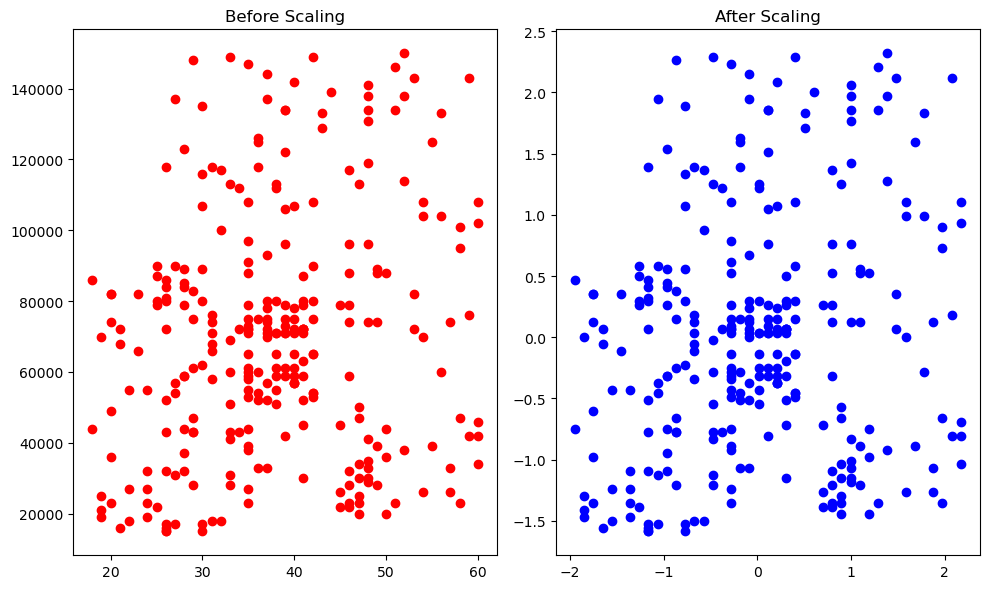

In [16]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.scatter(x_train['Age'],x_train['EstimatedSalary'],marker = 'o',color = 'red')
plt.title("Before Scaling")

plt.subplot(1,2,2)
plt.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],marker = 'o',color = 'blue')
plt.title('After Scaling')

plt.tight_layout()
plt.show()

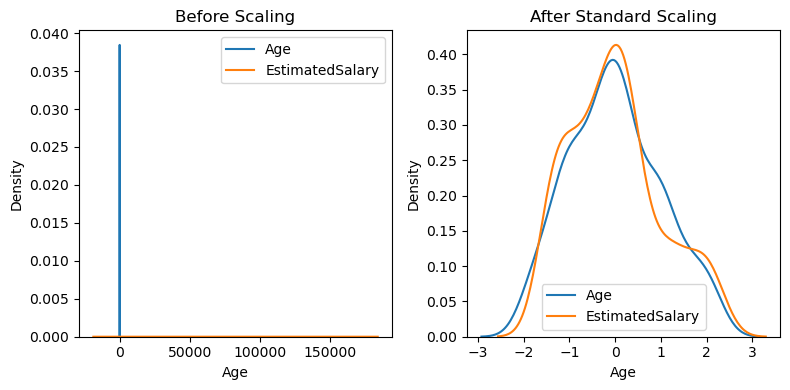

In [17]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
# before Scaling
sns.kdeplot(x_train['Age'],label = 'Age')
sns.kdeplot(x_train['EstimatedSalary'],label = 'EstimatedSalary')
plt.title('Before Scaling')
plt.legend()

# After Scaling
plt.subplot(1,2,2)
sns.kdeplot(x_train_scaled['Age'], label = 'Age')
sns.kdeplot(x_train_scaled['EstimatedSalary'], label = 'EstimatedSalary')
plt.title('After Standard Scaling')
plt.legend()

plt.tight_layout()
plt.show()

# Comparison of Distribution

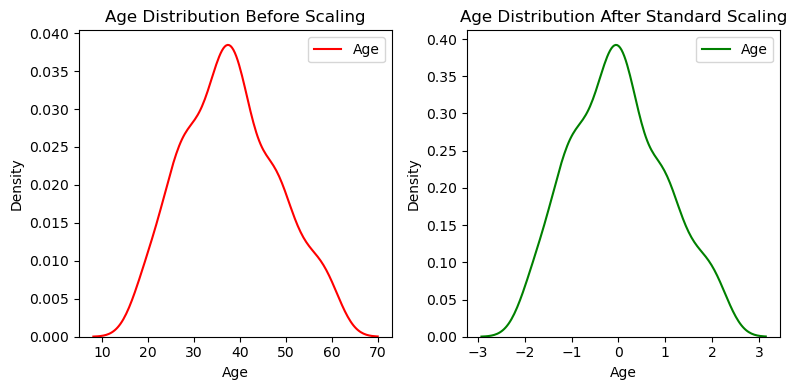

In [18]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
# before Scaling
sns.kdeplot(x_train['Age'],label = 'Age',color = 'red')
plt.title('Age Distribution Before Scaling')
plt.legend()

# After Scaling
plt.subplot(1,2,2)
sns.kdeplot(x_train_scaled['Age'], label = 'Age',color = 'green')
plt.title('Age Distribution After Standard Scaling')
plt.legend()

plt.tight_layout()
plt.show()

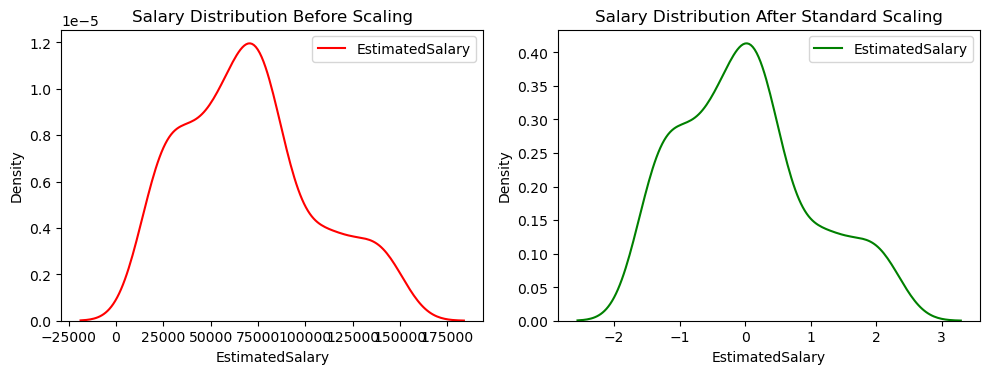

In [19]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
# before Scaling
sns.kdeplot(x_train['EstimatedSalary'],label = 'EstimatedSalary',color = 'red')
plt.title('Salary Distribution Before Scaling')
plt.legend()

# After Scaling
plt.subplot(1,2,2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], label = 'EstimatedSalary',color = 'green')
plt.title('Salary Distribution After Standard Scaling')
plt.legend()

plt.tight_layout()
plt.show()

# Why Scaling is importantant

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [39]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [40]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
print('Actual:',accuracy_score(y_test,y_pred))
print('Scaled:',accuracy_score(y_test,y_pred_scaled))

Actual: 0.875
Scaled: 0.8666666666666667


In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [34]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [35]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [36]:
print('Actual:',accuracy_score(y_test,y_pred))
print('Scaled:',accuracy_score(y_test,y_pred_scaled))

Actual: 0.8666666666666667
Scaled: 0.8666666666666667


In [43]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000
